In [3]:
import os
import re
import cv2
import fnmatch
import numpy as np
import pandas as pd
import open3d as o3d
import pyvista as pv
import plotly.express as px
import matplotlib.pyplot as plt
import image_stack_to_pcd as nk_module

In [2]:
% load_ext autoreload
% autoreload 2

In [17]:
def get_path (path: str):
	file_names = os.listdir (path)
	file_path = []

	for file_name in file_names:
		file_path.append (os.path.abspath (f'{path}/{file_name}'))

	return file_path


path = 'bv'
files = get_path (path = path)
files

['/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_98.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_72.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_99.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_75.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_74.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_89.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_76.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_77.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_88.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv/bv_91.tif',
 '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM

In [31]:
img = cv2.imread (files [0], 0)

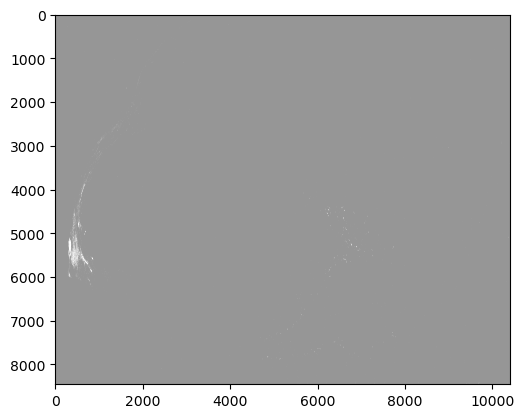

In [27]:
plt.imshow (img, 'gray')

# Otsu's Binarisation

In [60]:
# blur
blurred = cv2.GaussianBlur (img, (9, 9), 0)

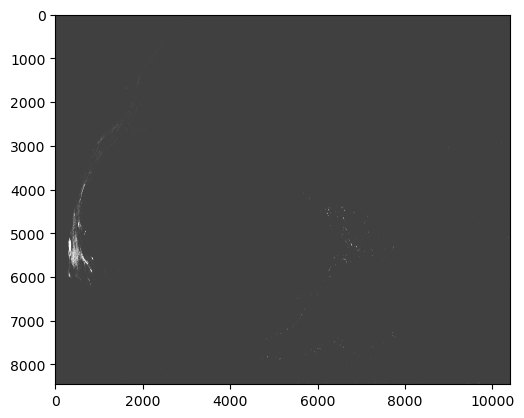

In [61]:
plt.imshow (blurred, 'gray')

[INFO] Otsu's thresholding value: 127.0


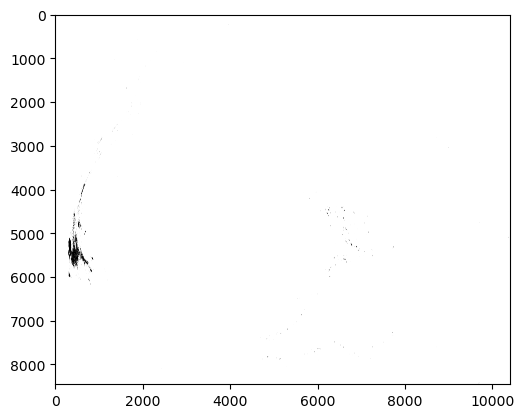

In [84]:
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold (
		src = blurred,
		thresh = 0,
		maxval = 255,
		type = cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
		)

plt.imshow (threshInv, 'gray')
print ("[INFO] Otsu's thresholding value: {}".format (T))

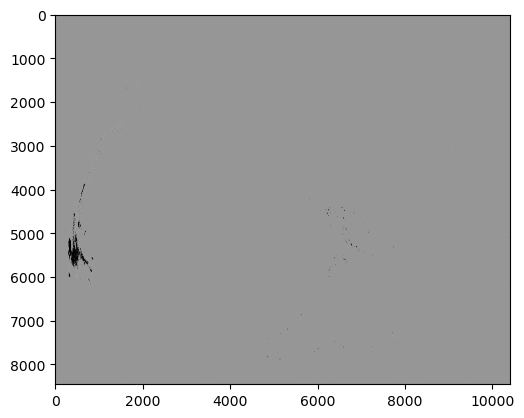

In [85]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and (threshInv, img, mask = threshInv)
plt.imshow (masked, 'gray')

# Visualisation

In [71]:
points = np.argwhere (threshInv == 0)
points = pd.DataFrame (
		data = points,
		columns = ['x', 'y']
		)
points ['z'] = np.ones (len (points))
pcd = pv.PolyData (points.values)
pcd.plot ()

Widget(value="<iframe src='http://localhost:58478/index.html?ui=P_0x7fe176cde730_1&reconnect=auto' style='widt…

# NK_module

In [4]:
STACK = nk_module.process_files_in_folder (
		folder_path = '/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv'
		)

Opened folder:
/Users/minkota/Library/CloudStorage/OneDrive-UniversityofGeorgia/IRM/3D rec/bv
There are 24 files in the folder

IMAGE PROCESSING STAGE

[INFO] File [1/24] is processing
[INFO] Otsu's thresholding value: 127.0
[INFO] Otsu's thresholding completed

[INFO] File [2/24] is processing
[INFO] Otsu's thresholding value: 125.0
[INFO] Otsu's thresholding completed

[INFO] File [3/24] is processing
[INFO] Otsu's thresholding value: 128.0
[INFO] Otsu's thresholding completed

[INFO] File [4/24] is processing
[INFO] Otsu's thresholding value: 127.0
[INFO] Otsu's thresholding completed

[INFO] File [5/24] is processing
[INFO] Otsu's thresholding value: 128.0
[INFO] Otsu's thresholding completed

[INFO] File [6/24] is processing
[INFO] Otsu's thresholding value: 126.0
[INFO] Otsu's thresholding completed

[INFO] File [7/24] is processing
[INFO] Otsu's thresholding value: 131.0
[INFO] Otsu's thresholding completed

[INFO] File [8/24] is processing
[INFO] Otsu's thresholding value: 127.

In [5]:
reconstructed_df = nk_module.tissue_reconstruction (stack = STACK)

The df size is: (3,)
Layer index is: [1/24]
The df size is: (158891, 3)
Layer index is: [2/24]
The df size is: (378295, 3)
Layer index is: [3/24]
The df size is: (631642, 3)
Layer index is: [4/24]
The df size is: (862271, 3)
Layer index is: [5/24]
The df size is: (1178058, 3)
Layer index is: [6/24]
The df size is: (1343381, 3)
Layer index is: [7/24]
The df size is: (1422256, 3)
Layer index is: [8/24]
The df size is: (1674658, 3)
Layer index is: [9/24]
The df size is: (1746549, 3)
Layer index is: [10/24]
The df size is: (1846650, 3)
Layer index is: [11/24]
The df size is: (1948181, 3)
Layer index is: [12/24]
The df size is: (2155543, 3)
Layer index is: [13/24]
The df size is: (2358600, 3)
Layer index is: [14/24]
The df size is: (2681800, 3)
Layer index is: [15/24]
The df size is: (2830552, 3)
Layer index is: [16/24]
The df size is: (3140904, 3)
Layer index is: [17/24]
The df size is: (98020759, 3)
Layer index is: [18/24]
The df size is: (98776595, 3)
Layer index is: [19/24]
The df size 

In [6]:
pd_reconstructed_df = pd.DataFrame (
		data = reconstructed_df,
		columns = ['x', 'y', 'z']
		)

In [7]:
pd_reconstructed_df.describe ()

,x,y,z
count,1.001557e+08,1.001557e+08,1.001557e+08
mean,4.583671e+03,5.218719e+03,1.580395e+01
std,2.690672e+03,2.994788e+03,1.799042e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.250000e+03,2.656000e+03,1.600000e+01
50%,4.588000e+03,5.211000e+03,1.600000e+01
75%,6.903000e+03,7.817000e+03,1.600000e+01
max,9.888000e+03,1.053000e+04,2.300000e+01


In [14]:
pcd = pv.PolyData (
	pd_reconstructed_df.loc [
		pd_reconstructed_df.z.between (0, 10)
	].values
	)

In [15]:
pcd.plot()

Widget(value="<iframe src='http://localhost:61289/index.html?ui=P_0x7fb1fc8460a0_0&reconnect=auto' style='widt…